# EEG-based Epilepsy Detection Using Machine Learning
# MATH516 Machine Learning and Artificial Intelligence for Healthcare
# MSc Health Data Science and Statistics - University of Plymouth
# Student ID: 10929338
# Date of Submission: April 2025


## 1. Data Preparation and Exploration

In [139]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, roc_auc_score, roc_curve, auc,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.feature_selection import SelectKBest, f_classif

In [141]:
# Load Dataset
df = pd.read_csv("/Users/mac/Downloads/Epileptic_featured _data.csv")

In [143]:
# Inspect: number of samples and features
df.shape

(198, 42)

In [145]:
df

,ID,pow_d,fr_d,cd1_d,cd2_d,cd3_d,cd4_d,cd5_d,cd6_d,pow_t,...,cd6_b,pow_g,fr_g,cd1_g,cd2_g,cd3_g,cd4_g,cd5_g,cd6_g,stat
0,104,0.002738,-5.6583,0.036320,0.085263,0.080991,-0.074508,-0.009881,-0.013535,0.005737,...,-0.12401,0.14298,-3.6805,0.262470,0.61617,0.58529,-0.53844,-0.071407,-0.097813,1
1,116,0.001038,-5.1795,0.084537,0.072065,-0.040925,-0.137560,0.042706,0.062946,0.002779,...,0.41673,0.58351,-3.1111,-0.080878,-1.10330,-1.83840,0.42514,0.496830,0.712690,1
2,117,0.008285,-4.7623,0.031132,0.118660,0.072105,-0.093199,0.042200,-0.021422,0.018769,...,0.85930,0.15079,-2.5285,-1.685500,-1.22000,0.63104,2.56250,-0.426800,-1.241900,1
3,124,0.043148,-4.2379,0.032466,0.196810,0.171380,-0.181750,0.030270,-0.059835,0.082812,...,-1.02680,11.21600,-1.5565,1.613700,4.83660,6.15950,-3.88050,-1.664800,-1.540100,1
4,134,0.057360,-3.8907,0.112120,0.214150,0.065827,-0.291960,0.120500,-0.002113,0.093434,...,-5.06020,7.04690,-1.5676,4.731700,-1.21520,-9.56020,-5.08090,3.472300,6.459600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,953,3081.800000,1.6067,145.080000,195.280000,-58.626000,-38.425000,-198.380000,-79.629000,698.170000,...,-84.21800,4031.90000,1.8174,-155.130000,-42.31700,115.49000,80.51500,-261.440000,54.857000,2
194,963,3133.200000,1.5565,124.050000,192.080000,-44.501000,-7.592500,-187.010000,-69.065000,549.670000,...,79.42900,86.42700,1.6971,-89.372000,17.52500,-24.92400,55.28900,-508.360000,154.750000,2
195,973,3079.700000,1.5147,99.366000,186.840000,-30.289000,23.385000,-171.440000,-56.570000,373.610000,...,176.22000,3300.50000,1.6213,149.530000,-2.06320,-160.97000,-195.04000,491.100000,-51.282000,2
196,983,2927.700000,1.4758,71.948000,179.820000,-16.396000,53.675000,-152.270000,-42.541000,224.250000,...,82.01200,38.80700,1.6906,-38.799000,61.92900,225.62000,46.63900,277.760000,-91.639000,2


In [147]:
df.columns

Index(['ID', 'pow_d', 'fr_d', 'cd1_d', 'cd2_d', 'cd3_d', 'cd4_d', 'cd5_d',
       'cd6_d', 'pow_t', 'fr_t', 'cd1_t', 'cd2_t', 'cd3_t', 'cd4_t', 'cd5_t',
       'cd6_t', 'pow_a', 'fr_a', 'cd1_a', 'cd2_a', 'cd3_a', 'cd4_a', 'cd5_a',
       'cd6_a', 'pow_b', 'fr_b', 'cd1_b', 'cd2_b', 'cd3_b', 'cd4_b', 'cd5_b',
       'cd6_b', 'pow_g', 'fr_g', 'cd1_g', 'cd2_g', 'cd3_g', 'cd4_g', 'cd5_g',
       'cd6_g', 'stat'],
      dtype='object')

In [149]:
df.isna().sum()

ID       0
pow_d    0
fr_d     0
cd1_d    0
cd2_d    0
cd3_d    0
cd4_d    0
cd5_d    0
cd6_d    0
pow_t    0
fr_t     0
cd1_t    0
cd2_t    0
cd3_t    0
cd4_t    0
cd5_t    0
cd6_t    0
pow_a    0
fr_a     0
cd1_a    0
cd2_a    0
cd3_a    0
cd4_a    0
cd5_a    0
cd6_a    0
pow_b    0
fr_b     0
cd1_b    0
cd2_b    0
cd3_b    0
cd4_b    0
cd5_b    0
cd6_b    0
pow_g    0
fr_g     0
cd1_g    0
cd2_g    0
cd3_g    0
cd4_g    0
cd5_g    0
cd6_g    0
stat     0
dtype: int64

In [151]:
# Initial Data Check
print(df.info())
print(df['stat'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      198 non-null    int64  
 1   pow_d   198 non-null    float64
 2   fr_d    198 non-null    float64
 3   cd1_d   198 non-null    float64
 4   cd2_d   198 non-null    float64
 5   cd3_d   198 non-null    float64
 6   cd4_d   198 non-null    float64
 7   cd5_d   198 non-null    float64
 8   cd6_d   198 non-null    float64
 9   pow_t   198 non-null    float64
 10  fr_t    198 non-null    float64
 11  cd1_t   198 non-null    float64
 12  cd2_t   198 non-null    float64
 13  cd3_t   198 non-null    float64
 14  cd4_t   198 non-null    float64
 15  cd5_t   198 non-null    float64
 16  cd6_t   198 non-null    float64
 17  pow_a   198 non-null    float64
 18  fr_a    198 non-null    float64
 19  cd1_a   198 non-null    float64
 20  cd2_a   198 non-null    float64
 21  cd3_a   198 non-null    float64
 22  cd

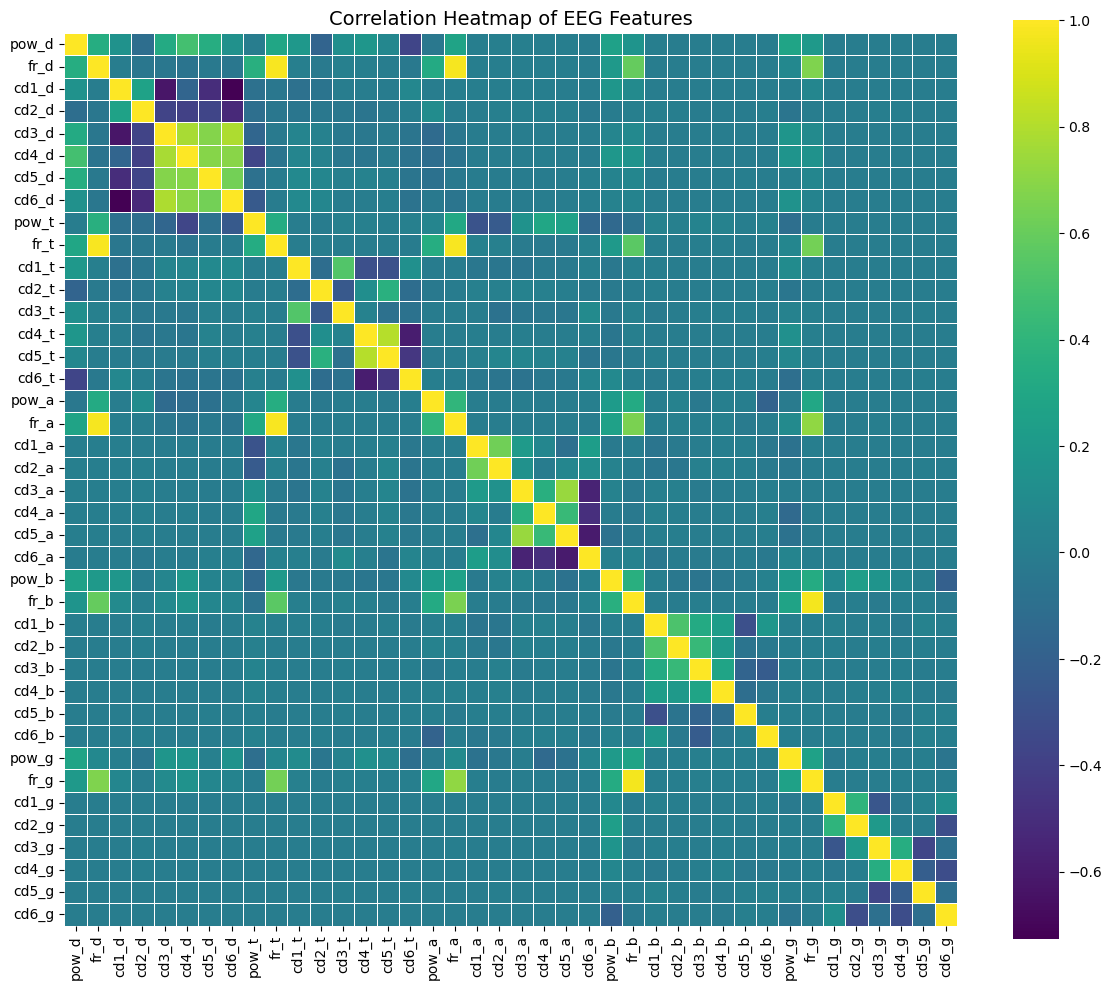

In [153]:
# Correlation Matrix for Feature Analysis 
cols_to_drop = [col for col in ['ID', 'stat'] if col in df.columns]
corr_matrix = df.drop(columns=cols_to_drop).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='viridis', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of EEG Features', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


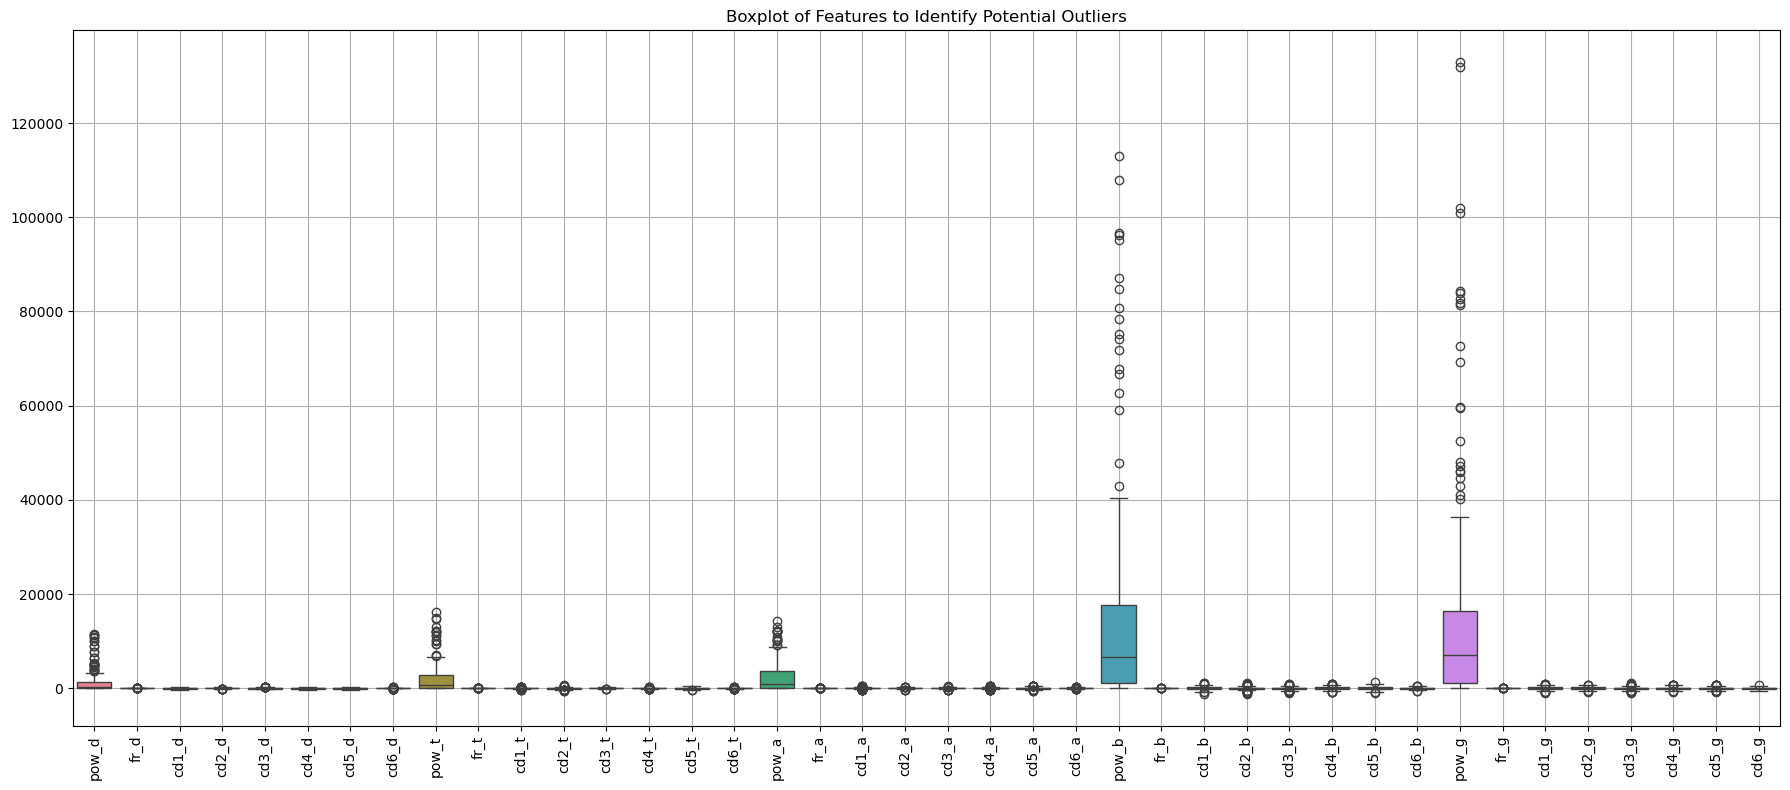

In [155]:
# boxplot for outlier visualization
X = df.drop(columns=['ID', 'stat'])  # EEG feature columns only
y = df['stat'].map({1: 1, 2: 0})     # Binary target mapping

plt.figure(figsize=(18, 8))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot of Features to Identify Potential Outliers')
plt.grid(True)
plt.tight_layout()
plt.show()


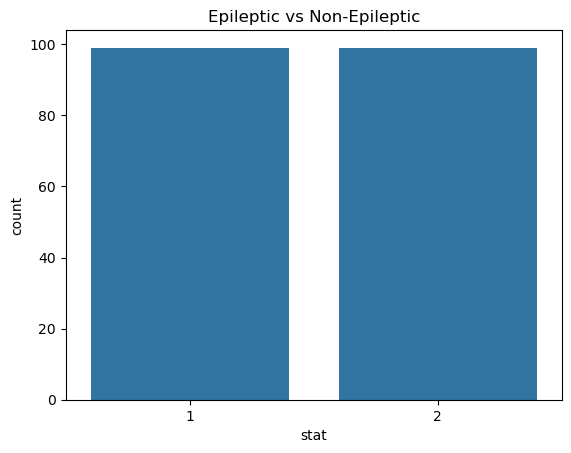

In [157]:
# Visualize Class Balance
sns.countplot(x='stat', data=df)
plt.title('Epileptic vs Non-Epileptic')
plt.show()

## 2. Preprocessing and Feature Scaling

In [160]:
# Preprocess Dataset
df = df.drop('ID', axis=1)
df['stat'] = df['stat'].map({1: 1, 2: 0})
X = df.drop('stat', axis=1)
y = df['stat']

In [162]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Model Selection and Evaluation

Calculating accuracies...
LR: 0.9847 (0.0233)
LDA: 0.9850 (0.0320)
KNN: 0.9650 (0.0391)
DT: 0.9847 (0.0233)
GNB: 0.9545 (0.0270)
SVM: 0.8637 (0.0981)
RF: 0.9950 (0.0150)
BG: 1.0000 (0.0000)
ET: 1.0000 (0.0000)
SGDC: 0.9695 (0.0409)


/var/folders/7j/vpqnf81d1892xyjzxgjdbf3m0000gn/T/ipykernel_71558/1539863970.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Accuracy', data=results_long, palette='Set3')


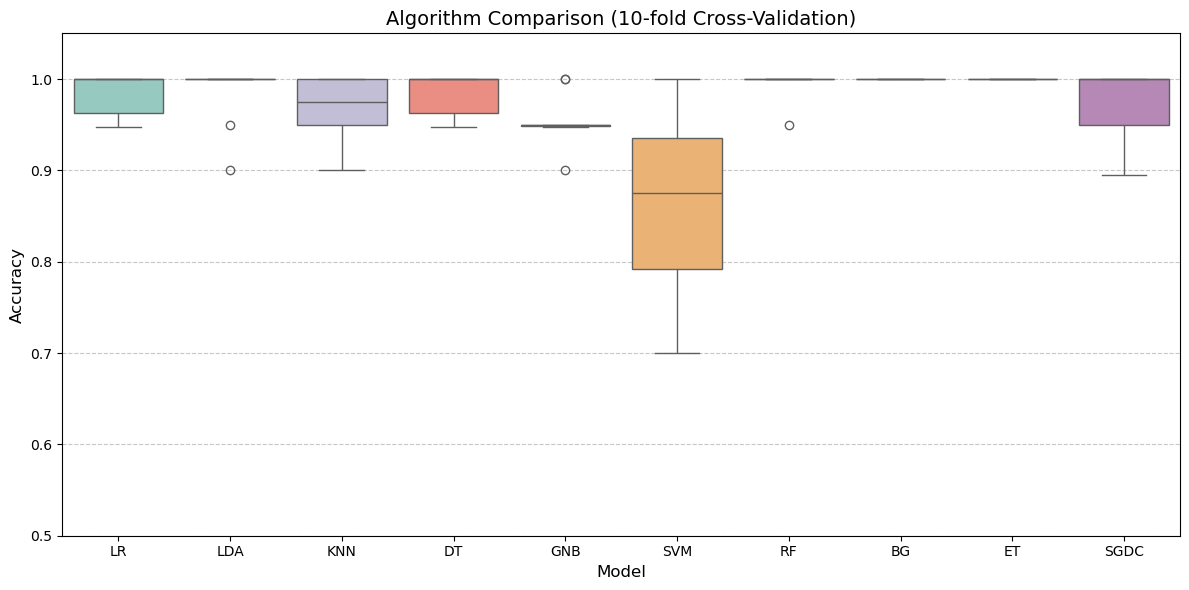

In [165]:
# Model Selection - Evaluation 

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Prepare models
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('GNB', GaussianNB()),
    ('SVM', SVC(kernel='poly')),
    ('RF', RandomForestClassifier()),
    ('BG', BaggingClassifier()),
    ('ET', ExtraTreesClassifier()),
    ('SGDC', SGDClassifier())
]

# Evaluate each model
results = []
names = []
print('Calculating accuracies...')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Convert results for seaborn
results_df = pd.DataFrame({name: result for name, result in zip(names, results)})
results_long = results_df.melt(var_name='Model', value_name='Accuracy')

# Create colorful boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Accuracy', data=results_long, palette='Set3')
plt.title('Algorithm Comparison (10-fold Cross-Validation)', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.5, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [167]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [169]:
# confirm splitting
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(198, 40) (138, 40) (60, 40) (138,) (60,)


## 4. Model Training

In [172]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [174]:
# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [176]:
# Train Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

## 5. Model Evaluation

In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Logistic Regression Evaluation
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Extract TN, FP, FN, TP
tn, fp, fn, tp = cm_lr.ravel()

# Calculate Specificity
specificity_lr = tn / (tn + fp)

# Print all metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred_lr):.4f}")
print(f"Specificity: {specificity_lr:.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")


Logistic Regression Performance:
Accuracy: 0.9833
Precision: 1.0000
Recall (Sensitivity): 0.9667
Specificity: 1.0000
F1-Score: 0.9831
AUC: 1.0000


In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Random Forest Evaluation (Full Features)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Extract TN, FP, FN, TP
tn, fp, fn, tp = cm_rf.ravel()

# Calculate Specificity
specificity_rf = tn / (tn + fp)

# Print all metrics
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred_rf):.4f}")
print(f"Specificity: {specificity_rf:.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")


Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
Specificity: 1.0000
F1-Score: 1.0000
AUC: 1.0000


In [185]:
# LDA Evaluation
y_pred_lda = lda.predict(X_test)
y_prob_lda = lda.predict_proba(X_test)[:, 1]
cm_lda = confusion_matrix(y_test, y_pred_lda)

# Extract TN, FP, FN, TP
tn, fp, fn, tp = cm_lda.ravel()

# Calculate Specificity
specificity_lda = tn / (tn + fp)

# Print all metrics
print("LDA Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lda):.4f}")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred_lda):.4f}")
print(f"Specificity: {specificity_lda:.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lda):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_lda):.4f}")


LDA Performance:
Accuracy: 0.9667
Precision: 1.0000
Recall (Sensitivity): 0.9333
Specificity: 1.0000
F1-Score: 0.9655
AUC: 1.0000


## 6. Cross-Validation and Hyperparameter Tuning

In [188]:
# Cross-Validation - Random Forest
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print('Cross-Validation AUC scores:', cv_scores)
print('Mean CV AUC:', np.mean(cv_scores))

Cross-Validation AUC scores: [1. 1. 1. 1. 1.]
Mean CV AUC: 1.0


In [190]:
# Hyperparameter Tuning – Random Forest (GridSearchCV)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print("Best parameters:", grid.best_params_)
print("Best cross-validated AUC:", grid.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated AUC: 1.0


## 7. Full Feature Importance Analysis

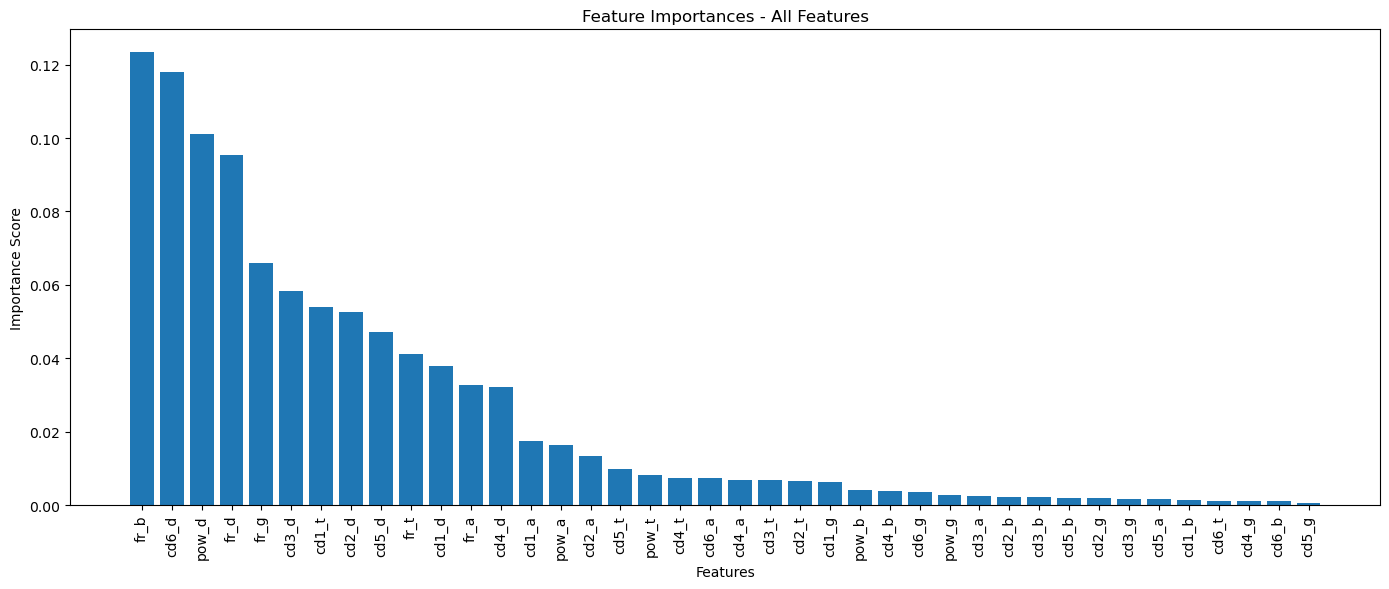

In [193]:
# Full Feature Importance Before Selection
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 6))
plt.title("Feature Importances - All Features")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


## 8. Feature Selection with SelectKBest

In [196]:
# 10 Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Top 10 Features:", list(selected_features))

Top 10 Features: ['pow_d', 'fr_d', 'cd2_d', 'cd3_d', 'cd5_d', 'pow_t', 'fr_t', 'pow_a', 'fr_a', 'fr_b']


/var/folders/7j/vpqnf81d1892xyjzxgjdbf3m0000gn/T/ipykernel_71558/4258670698.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_importances, palette='viridis')


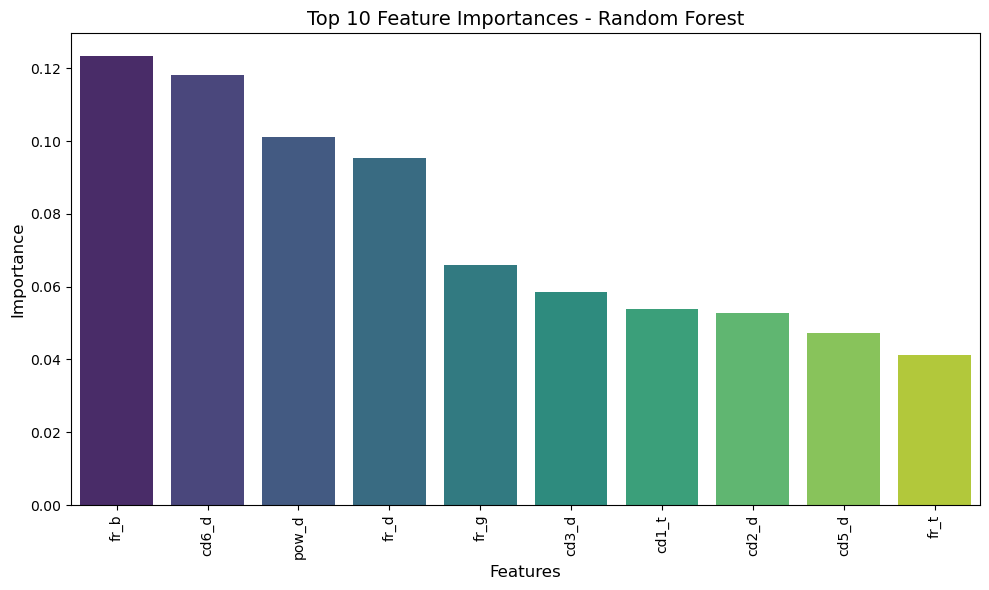

In [198]:
# Feature Importance - Random Forest 

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = [X.columns[i] for i in indices[:10]]
top_importances = importances[indices[:10]]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_importances, palette='viridis')

plt.title("Top 10 Feature Importances - Random Forest", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 9. Retraining Random Forest on Selected Features

In [201]:
# Retrain RF on Selected Features
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.3, stratify=y, random_state=42)
rf_sel = RandomForestClassifier()
rf_sel.fit(X_train_sel, y_train_sel)

RandomForestClassifier()

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluate Feature-Selected Random Forest Model
y_pred_sel = rf_sel.predict(X_test_sel)
y_prob_sel = rf_sel.predict_proba(X_test_sel)[:, 1]
cm_sel = confusion_matrix(y_test_sel, y_pred_sel)

# Extract TN, FP, FN, TP
tn, fp, fn, tp = cm_sel.ravel()

# Calculate Specificity
specificity_sel = tn / (tn + fp)

# Print all metrics
print("Feature-Selected Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test_sel, y_pred_sel):.4f}")
print(f"Precision: {precision_score(y_test_sel, y_pred_sel):.4f}")
print(f"Recall (Sensitivity): {recall_score(y_test_sel, y_pred_sel):.4f}")
print(f"Specificity: {specificity_sel:.4f}")
print(f"F1-Score: {f1_score(y_test_sel, y_pred_sel):.4f}")
print(f"AUC: {roc_auc_score(y_test_sel, y_prob_sel):.4f}")


Feature-Selected Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
Specificity: 1.0000
F1-Score: 1.0000
AUC: 1.0000


## 10. Minimal Feature Set Evaluation

In [113]:
# Minimal Feature Set Evaluation (yeilding AUC > 0.8)
from sklearn.metrics import roc_auc_score, accuracy_score

results = []
for k in [2, 3, 5, 7, 10]:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_k = selector.fit_transform(X_train, y_train)
    X_test_k = selector.transform(X_test)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_k, y_train)
    y_prob = rf_model.predict_proba(X_test_k)[:, 1]
    y_pred = rf_model.predict(X_test_k)

    auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)

    results.append({"Top k Features": k, "AUC": auc, "Accuracy": acc})

df_k_results = pd.DataFrame(results)
df_k_results


,Top k Features,AUC,Accuracy
0,2,0.965000,0.866667
1,3,0.932778,0.866667
2,5,0.982222,0.950000
3,7,1.000000,1.000000
4,10,1.000000,1.000000


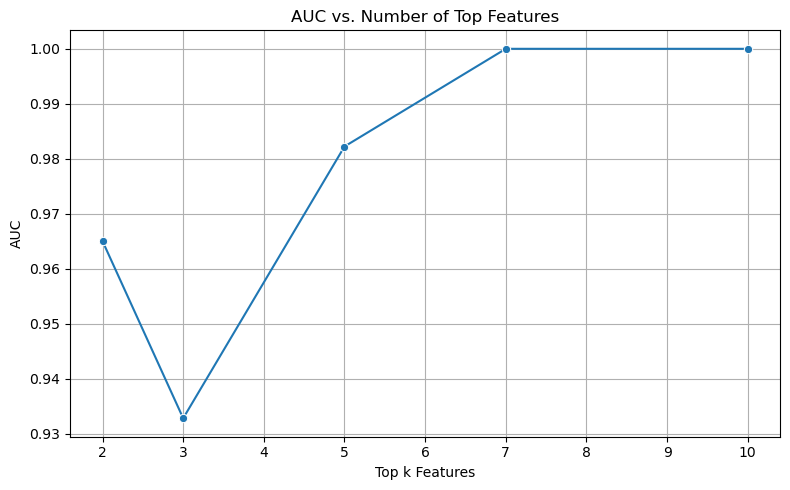

In [115]:

plt.figure(figsize=(8, 5))
sns.lineplot(x='Top k Features', y='AUC', data=df_k_results, marker='o')
plt.title("AUC vs. Number of Top Features")
plt.grid(True)
plt.tight_layout()
plt.show()


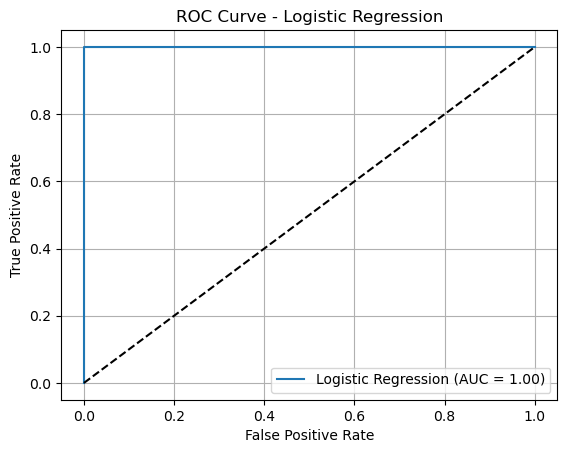

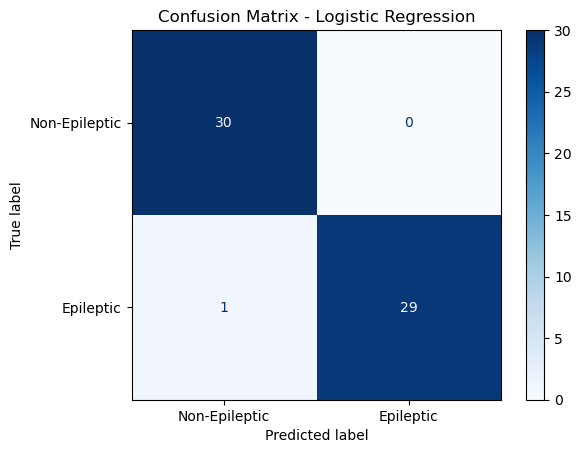

In [117]:
# ROC and Confusion Matrix for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr, display_labels=['Non-Epileptic', 'Epileptic']).plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.grid(False)
plt.show()

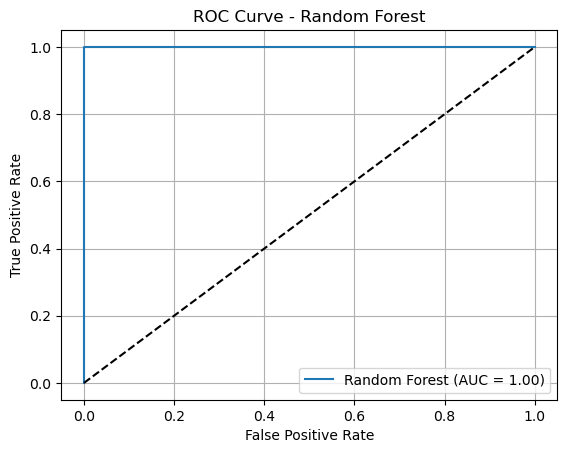

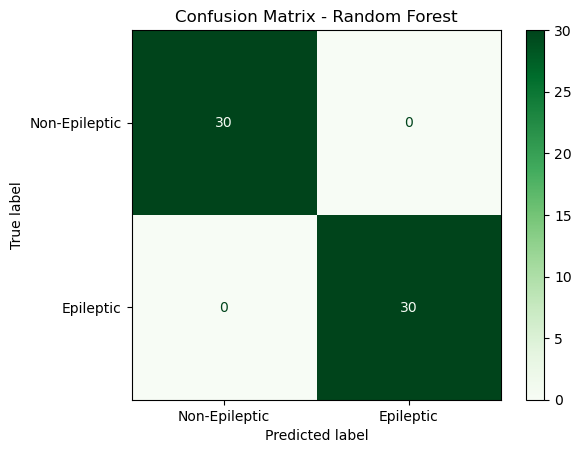

In [119]:
# ROC and Confusion Matrix for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=['Non-Epileptic', 'Epileptic']).plot(cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.grid(False)
plt.show()

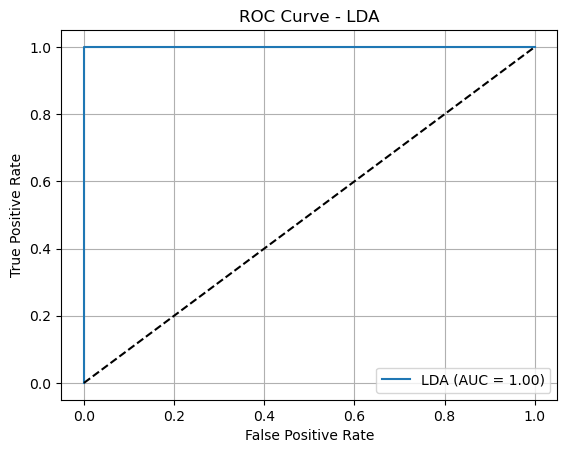

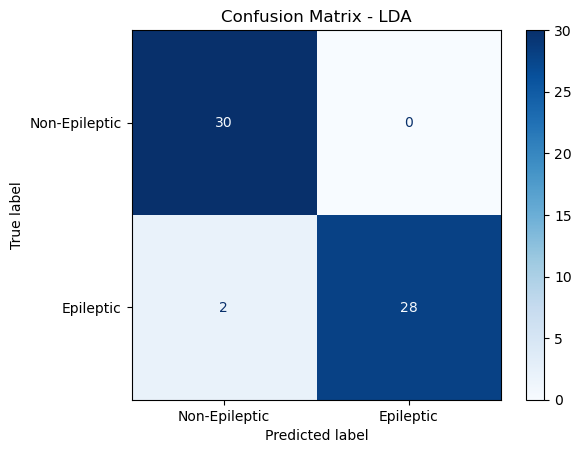

In [121]:
# ROC and Confusion Matrix for LDA
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
plt.figure()
plt.plot(fpr_lda, tpr_lda, label='LDA (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_lda))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LDA')
plt.legend()
plt.grid()
plt.show()

cm_lda = confusion_matrix(y_test, y_pred_lda)
ConfusionMatrixDisplay(cm_lda, display_labels=['Non-Epileptic', 'Epileptic']).plot(cmap='Blues')
plt.title('Confusion Matrix - LDA')
plt.grid(False)
plt.show()


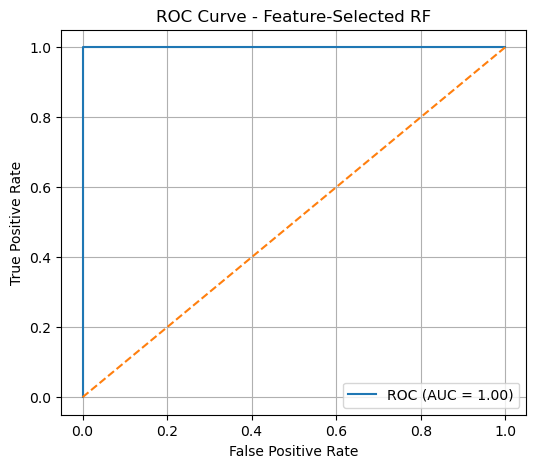

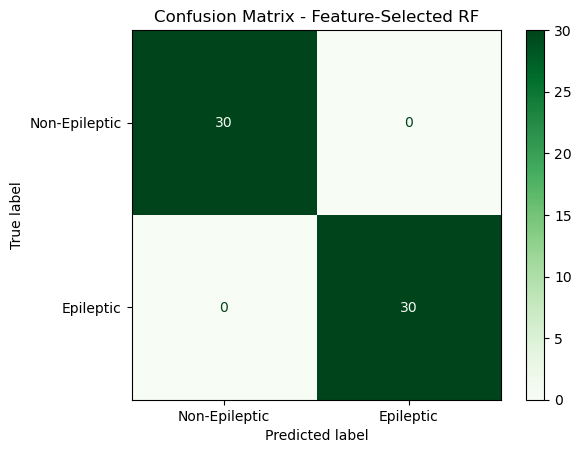

In [134]:
# ROC + Confusion Matrix - Feature-Selected RF
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

fpr_sel, tpr_sel, _ = roc_curve(y_test_sel, y_prob_sel)
roc_auc_sel = auc(fpr_sel, tpr_sel)

plt.figure(figsize=(6, 5))
plt.plot(fpr_sel, tpr_sel, label=f'ROC (AUC = {roc_auc_sel:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Feature-Selected RF')
plt.legend(loc='lower right')
plt.grid()
plt.show()

cm_sel = confusion_matrix(y_test_sel, y_pred_sel)
ConfusionMatrixDisplay(confusion_matrix=cm_sel, display_labels=['Non-Epileptic', 'Epileptic']).plot(cmap='Greens')
plt.title('Confusion Matrix - Feature-Selected RF')
plt.grid(False)
plt.show()


Summary of Key Findings:

Three models were trained: Logistic Regression, Random Forest, and Linear Discriminant Analysis (LDA).

Random Forest achieved the highest overall performance, with an AUC of 1.00 and perfect classification on the test set.

Logistic Regression and LDA also performed strongly, achieving AUC values between 0.98 and 1.00, albeit with slightly lower recall or precision.

Feature selection using SelectKBest allowed the Random Forest model to retain near-perfect classification performance using only the top 10 most informative features.

Findings were validated through 10-fold cross-validation, ROC curve analysis, and confusion matrix evaluation.

The results suggest that machine learning techniques can reliably detect epileptic patterns in EEG-derived features, with Random Forest offering the best trade-off between accuracy, robustness, and interpretability.

